##Plot position of the calibrator (RA and Dec)

In [1]:
import numpy as np

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
import pandas as pd

In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.cm as cm

Inline matplotlib plot

In [7]:
%matplotlib inline

Read the data

In [8]:
data = pd.read_csv("/home/ridlo/project/ALMA/alma-calibrator/src/CalSept2015.list", names=["Band Name", "Catalogue Name", "Date Observed", "RA (J2000)", "RA Uncertainty", "DEC (J2000)", "DEC Uncertainty", "Flux Density", "Flux Uncertainty", "Frequency", "Separation", "UV Min", "UV Max", "Names"], header=6)

In [9]:
data

,Band Name,Catalogue Name,Date Observed,RA (J2000),RA Uncertainty,DEC (J2000),DEC Uncertainty,Flux Density,Flux Uncertainty,Frequency,Separation,UV Min,UV Max,Names
0,ALMA-Band 3,ALMA,2015-09-06,343.490616,2.800000e-08,16.148211,2.800000e-08,19.950,0.7100,9.146000e+10,0,0,-1323.9,J2253+1608|J2253+161|J225358+160853|3C454.3|B2...
1,ALMA-Band 3,ALMA,2015-08-27,49.950667,3.900000e-08,41.511696,3.100000e-08,17.670,0.4900,9.146000e+10,0,0,-537.5,J0319+4130|J0319+415|J031947+413042|3C84|B0316...
2,ALMA-Band 3,ALMA,2015-08-27,49.950667,3.900000e-08,41.511696,3.100000e-08,16.820,0.6800,1.034900e+11,0,0,-537.5,J0319+4130|J0319+415|J031947+413042|3C84|B0316...
3,ALMA-Band 3,ALMA,2015-08-30,194.046529,2.800000e-08,-5.789313,2.800000e-08,14.100,0.5000,1.034900e+11,0,0,-1286.3,J1256-0547|J1256-057|J125610-054722|3C279|B125...
4,ALMA-Band 3,ALMA,2015-08-15,194.046529,2.800000e-08,-5.789313,2.800000e-08,13.700,0.1700,1.034900e+11,0,0,-1286.3,J1256-0547|J1256-057|J125610-054722|3C279|B125...
5,ALMA-Band 6,ALMA,2015-08-16,343.490616,2.800000e-08,16.148211,2.800000e-08,13.600,0.5300,2.330000e+11,0,0,-1323.9,J2253+1608|J2253+161|J225358+160853|3C454.3|B2...
6,ALMA-Band 7,ALMA,2015-08-27,343.490616,2.800000e-08,16.148211,2.800000e-08,12.440,1.1000,3.434800e+11,0,0,-1323.9,J2253+1608|J2253+161|J225358+160853|3C454.3|B2...
7,ALMA-Band 6,ALMA,2015-05-31,49.950667,3.900000e-08,41.511696,3.100000e-08,9.820,0.3300,2.330000e+11,0,0,-600.0,J0319+4130|J0319+415|J031947+413042|3C84|B0316...
8,ALMA-Band 3,ALMA,2015-08-30,187.277917,2.800000e-08,2.052388,2.800000e-08,9.130,0.4900,1.034900e+11,0,20,3000.0,J1229+0203|J1229+020|3C273|B1226+023
9,ALMA-Band 3,ALMA,2011-10-31,330.680381,3.900000e-08,42.277772,2.800000e-08,8.960,0.4500,9.770000e+10,0,0,-64.4,J2202+4216|J2202+422|B2200+420|BLLAC


In [10]:
ra = data["RA (J2000)"].copy(); dec = data["DEC (J2000)"].copy()

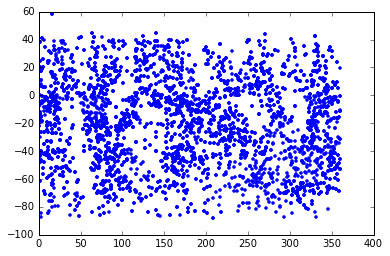

In [11]:
plt.plot(ra, dec, 'b.')

Note: ALMA located at 23.0278° S, 67.7548° W

###Using flux density as color

In [12]:
flux_log = np.log(data['Flux Density'])

In [13]:
max_flux = flux_log.max()

In [14]:
cmap = plt.cm.rainbow

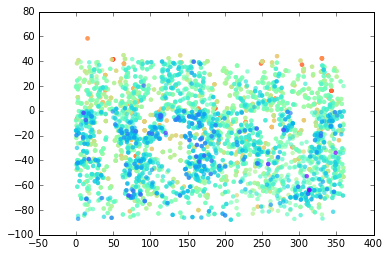

In [15]:
plt.scatter(ra, dec, c=flux_log/max_flux, lw=0, alpha=0.7, cmap=cmap)

###Map projection plot
####Equatorial coordinate

In [16]:
from mpl_toolkits.basemap import Basemap

In [17]:
m = Basemap(projection='moll', lon_0=0) # center at 'longitude' 0

Shift RA [-180, 180]

In [18]:
ra_change = pd.concat([ra[ra <= 180.0], ra[ra > 180.0] - 360]).sort_index()

In [19]:
x, y = m(ra_change.values, dec.values) # pandas DFrame

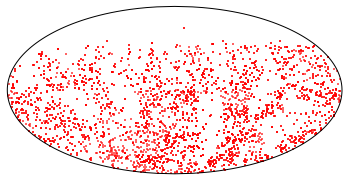

In [20]:
m.scatter(x, y, 2, marker='.', color='r')

####Galactic coordinate

In [21]:
from astropy.coordinates import SkyCoord

In [22]:
from astropy import units as u

In [23]:
c = SkyCoord(data["RA (J2000)"].values, data["DEC (J2000)"].values, frame='icrs', unit='deg')

In [24]:
g = c.galactic

Shift galactic longitude [-180, 180]

In [25]:
g_l = []

In [26]:
for l in g.l.degree:
    if l < 180:
        g_l.append(l)
    else:
        g_l.append(l - 360)

In [27]:
x, y = m(g_l, g.b.degree)

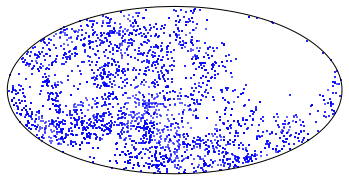

In [28]:
m.scatter(x, y, 2, marker='.', color='b')